# TASK:
         Breast Cancer Detection
          
     


1. **mean radius**: mean of distances from center to points on the perimeter.
2. **mean texture**: standard deviation of gray-scale values.
3. **mean perimeter**: mean size of the core tumor.
4. **mean area**: mean area of the core tumor.
5. **mean smoothness**: mean of local variation in radius lengths.
6. **mean compactness**: mean of perimeter^2 / area - 1.0.
7. **mean concavity**: mean of severity of concave portions of the contour.
8. **mean concave points**: mean for number of concave portions of the contour.
9. **mean symmetry**: mean symmetry of cell nuclei.
10. **mean fractal dimension**: mean "coastline approximation" of the cell nuclei.
11. **radius error**: standard error of the mean of distances from center to points on the perimeter.
12. **texture error**: standard error of gray-scale values.
13. **perimeter error**: standard error of size of the core tumor.
14. **area error**: standard error of area of the core tumor.
15. **smoothness error**: standard error of local variation in radius lengths.
16. **compactness error**: standard error of perimeter^2 / area - 1.0.
17. **concavity error**: standard error for severity of concave portions of the contour.
18. **concave points error**: standard error for number of concave portions of the contour.
19. **symmetry error**: standard error of symmetry of cell nuclei.
20. **fractal dimension error**: standard error of "coastline approximation" of the cell nuclei.
21. **worst radius**: "worst" or largest mean value for mean of distances from center to points on the perimeter.
22. **worst texture**: "worst" or largest mean value for standard deviation of gray-scale values.
23. **worst perimeter**: "worst" or largest mean value for mean size of the core tumor.
24. **worst area**: "worst" or largest mean value for mean area of the core tumor.
25. **worst smoothness**: "worst" or largest mean value for mean of local variation in radius lengths.
26. **worst compactness**: "worst" or largest mean value for mean of perimeter^2 / area - 1.0.
27. **worst concavity**: "worst" or largest mean value for mean severity of concave portions of the contour.
28. **worst concave points**: "worst" or largest mean value for mean number of concave portions of the contour.
29. **worst symmetry**: "worst" or largest mean value for mean symmetry of cell nuclei.
30. **worst fractal dimension**: "worst" or largest mean value for mean "coastline approximation" of the cell nuclei ¹.



In [1]:
#Importing the Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#load the data
data = pd.read_csv('data.csv')
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
#shape of the data
data.shape


(569, 33)

In [4]:
#data types 
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [5]:
#data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
#data describe
data.describe().round(2)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,0.0
mean,3.037183e+07,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,...,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08,NaN
std,1.250206e+08,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,...,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02,NaN
min,8.670000e+03,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,...,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06,NaN
25%,8.692180e+05,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,...,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07,NaN
50%,9.060240e+05,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,...,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08,NaN
75%,8.813129e+06,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,...,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09,NaN
max,9.113205e+08,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,...,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21,NaN


In [7]:
#data cleaning 
data.drop(columns=['id','Unnamed: 32'],axis=1,inplace= True)

In [8]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
#value counts of target variable
data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [10]:
#percentage of the target variable
data['diagnosis'].value_counts()/data['diagnosis'].count() *100

diagnosis
B    62.741652
M    37.258348
Name: count, dtype: float64

In [11]:

data.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [12]:
#change the target variable to number
data['target']=pd.get_dummies(data['diagnosis'],dtype=int,drop_first=True)

In [13]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [23]:
#droping the column
data.drop('diagnosis',axis=1,inplace=True)

In [24]:
# seprating the feature and target variable
X = data.drop(columns='target', axis=1)
y = data['target']

In [25]:
print(X)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [26]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: target, Length: 569, dtype: int32


In [27]:
#spliting the data 
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [28]:
#shape of the data
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


In [29]:
#scaling the data
from sklearn.preprocessing import StandardScaler

In [30]:
#implement the scaling
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

In [37]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata (3.6 kB)
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata (5.1 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached absl_py-2.0.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.26

In [41]:
!pip install tensorflow[and-cuda]

In [42]:
# importing tensorflow and Keras
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [43]:
# setting up the layers of Neural Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(30,)),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])

In [44]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
# training the Meural Network

history = model.fit(X_train_std, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 [==============================] - 4s 85ms/step - loss: 0.8620 - accuracy: 0.5697 - val_loss: 0.4503 - val_accuracy: 0.7609
Epoch 2/10
13/13 [==============================] - 0s 15ms/step - loss: 0.5729 - accuracy: 0.7653 - val_loss: 0.3021 - val_accuracy: 0.9130
Epoch 3/10
13/13 [==============================] - 0s 19ms/step - loss: 0.4083 - accuracy: 0.8313 - val_loss: 0.2315 - val_accuracy: 0.9565
Epoch 4/10
13/13 [==============================] - 0s 14ms/step - loss: 0.3205 - accuracy: 0.8680 - val_loss: 0.1946 - val_accuracy: 0.9565
Epoch 5/10
13/13 [==============================] - 0s 27ms/step - loss: 0.2608 - accuracy: 0.8973 - val_loss: 0.1715 - val_accuracy: 0.9565
Epoch 6/10
13/13 [==============================] - 0s 30ms/step - loss: 0.2220 - accuracy: 0.9193 - val_loss: 0.1558 - val_accuracy: 0.9565
Epoch 7/10
13/13 [==============================] - 1s 42ms/step - loss: 0.1955 - accuracy: 0.9291 - val_loss: 0.1440 - val_accuracy: 0.9783
Epoch 8/10
13

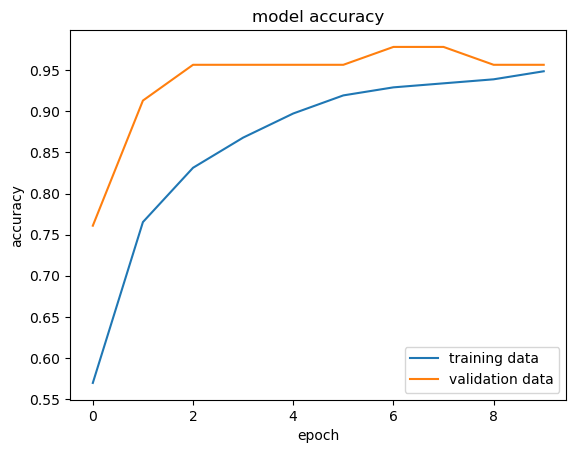

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

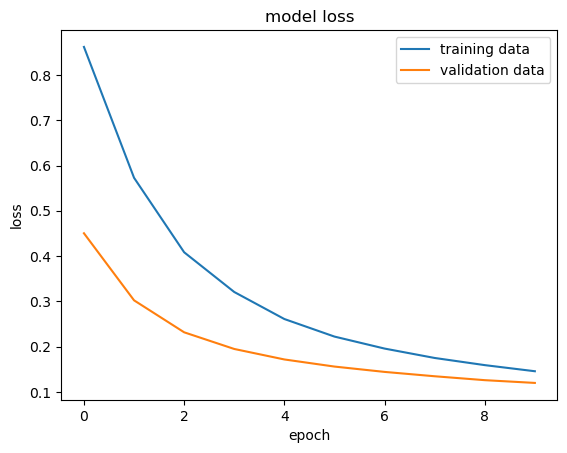

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [50]:
loss, accuracy = model.evaluate(X_test_std, y_test)
print(accuracy)

4/4 [==============================] - 0s 11ms/step - loss: 0.1786 - accuracy: 0.9474
0.9473684430122375


In [51]:
print(X_test_std.shape)
print(X_test_std[0])

(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [52]:
Y_pred = model.predict(X_test_std)

4/4 [==============================] - 0s 7ms/step


In [53]:
print(Y_pred.shape)
print(Y_pred[0])

(114, 2)
[0.8087461  0.28063762]


In [54]:
print(X_test_std)

[[-0.04462793 -1.41612656 -0.05903514 ... -0.18278004 -1.23064515
  -0.6268286 ]
 [ 0.24583601 -0.06219797  0.21802678 ...  0.54129749  0.11047691
   0.0483572 ]
 [-1.26115925 -0.29051645 -1.26499659 ... -1.35138617  0.269338
  -0.28231213]
 ...
 [ 0.72709489  0.45836817  0.75277276 ...  1.46701686  1.19909344
   0.65319961]
 [ 0.25437907  1.33054477  0.15659489 ... -1.29043534 -2.22561725
  -1.59557344]
 [ 0.84100232 -0.06676434  0.8929529  ...  2.15137705  0.35629355
   0.37459546]]


In [55]:
print(Y_pred)

[[8.08746099e-01 2.80637622e-01]
 [5.64863920e-01 5.06588817e-01]
 [7.43131995e-01 6.78339154e-02]
 [1.08014634e-02 9.98490036e-01]
 [4.70682055e-01 5.06413758e-01]
 [8.01118165e-02 9.95319784e-01]
 [4.41945851e-01 1.87036365e-01]
 [9.18485284e-01 7.50690773e-02]
 [7.46636927e-01 1.58811212e-01]
 [9.01051283e-01 1.41939178e-01]
 [3.68239850e-01 5.02696335e-01]
 [6.63044155e-01 2.23224223e-01]
 [7.46981263e-01 4.35293131e-02]
 [5.66882610e-01 2.92620838e-01]
 [7.36651242e-01 7.34087452e-02]
 [1.38261467e-01 8.16763401e-01]
 [8.62643600e-01 9.35457647e-02]
 [8.67271662e-01 1.28894061e-01]
 [8.18710387e-01 8.03467929e-02]
 [1.87611848e-01 9.84733760e-01]
 [1.14140280e-01 9.44696784e-01]
 [9.28534567e-01 8.42287391e-02]
 [8.87552977e-01 8.24169666e-02]
 [9.43839550e-01 6.61714524e-02]
 [8.65746558e-01 1.49601296e-01]
 [1.64530292e-01 9.86428618e-01]
 [7.95005620e-01 2.83555150e-01]
 [7.77806818e-01 4.48505223e-01]
 [1.21323153e-01 9.83197629e-01]
 [9.17696357e-02 9.83273327e-01]
 [8.214075

In [56]:
#  argmax function

my_list = [0.25, 0.56]

index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)

[0.25, 0.56]
1


In [57]:
# converting the prediction probability to class labels

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]


In [58]:
input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
    print('The tumor is Malignant')

else:
    print('The tumor is Benign')






f:\Users\Baskar\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
[[0.8784491  0.05301854]]
[0]
The tumor is Malignant
